# Exploratory Data Analysis & Visualization - Ford GoBike ( February 2019)
## by (Daniel .A. Ogiku)




<a id='intro'></a>
## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

This document explores the trip data from the Ford GoBike's sharing system for public containing bike rides from February 2019. The attributes included the trip start/end time, as well as additional variabless such as user type, gender, and age

## Table of Contents
- [Introduction](#introduction)
- [Preliminary Wrangling](#Preliminary_Wrangling)
- [Univariate Exploration](#Univariate_Exploration)
- [Bivariate Exploration](#Bivariate_Exploration)
- [Multivariate Exploration](#Multivariate_Exploration)
- [Summary](#Summary)
- [Sources](#Sources)




## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load dataset into pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

#print loaded data
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_dayofweek,start_time_hour,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,False,35,Thu,17,869
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,False,47,Thu,12,1030
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,False,30,Thu,17,608
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,False,45,Thu,23,26
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,False,60,Thu,23,29


Overview of data shape and composition

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int64  
 14  memb

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,start_time_hour,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865,13.456165,11.241461
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731,4.734282,27.371269
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000,0.000000,1.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000,9.000000,5.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000,14.000000,8.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000,17.000000,13.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000,23.000000,1409.000000


In [5]:
#checking for NaN values
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
member_age                 0
start_time_dayofweek       0
start_time_hour            0
duration_min               0
dtype: int64

In [6]:
df.shape

(174952, 20)

In [7]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year            int64
member_gender               object
bike_share_for_all_trip       bool
member_age                   int64
start_time_dayofweek        object
start_time_hour              int64
duration_min                 int64
dtype: object

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,member_age,start_time_hour,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865,13.456165,11.241461
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731,4.734282,27.371269
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000,0.000000,1.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000,9.000000,5.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000,14.000000,8.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000,17.000000,13.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000,23.000000,1409.000000


In [9]:
df.duplicated().sum()
# No duplicates here

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  int64  
 14  memb

### Cleaning

#### There are some quality issues that need to be addressed before assessing the data to draw conclusions.

Start/end times are not in the timestamp format<br>

The following columns are not in object format:<br>
start_station_id
end_station_id
bike_id<br>

Need to calculate member age from member birth year

Member birth is in the float format, but should be converted to integer format<br>


In [11]:
# create a copy of the data
df_bike = df.copy()

### Define: 
Converting columns to the appropriate data type

### Code

In [12]:
# change string datatype for start and end time to be datetime datatype
df_bike.start_time = pd.to_datetime(df_bike.start_time)
df_bike.end_time = pd.to_datetime(df_bike.end_time)

In [13]:
# Change the user_type, member_gender to category format
df_bike.user_type = df_bike.user_type.astype('category')
df_bike.member_gender = df_bike.member_gender.astype('category')

In [14]:
# change the string for bike_share_for_all_trip to be boolean
df_bike.bike_share_for_all_trip = (df_bike.bike_share_for_all_trip == 'Yes')

In [15]:
# Changing the bike_id, start_station_id, and end_station_id to object
df_bike.bike_id = df_bike.bike_id.astype(str)
df_bike.start_station_id = df_bike.start_station_id.astype(str)
df_bike.end_station_id = df_bike.end_station_id.astype(str)

### Test

In [16]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [17]:
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
member_age                 0
start_time_dayofweek       0
start_time_hour            0
duration_min               0
dtype: int64

#### Define
Remove rows with null values

#### code

In [18]:

df_bike = df_bike[df_bike['member_gender'].isnull() == False]
df_bike = df_bike[df_bike['end_station_id'].isnull() == False]
df_bike = df_bike[df_bike['member_birth_year'].isnull() == False]
df_bike = df_bike[df_bike['end_station_name'].isnull() == False]

#### Test

In [19]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [20]:
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
member_age                 0
start_time_dayofweek       0
start_time_hour            0
duration_min               0
dtype: int64

#### Define:
Calculate the age of each member by subtracting their birth year from the current year (2019) and change the datatype to integer

#### code

In [21]:
# Calculate member_age from member_birth_year
df_bike['member_age'] = 2019 - df_bike['member_birth_year']

In [22]:
# Convert the member_age and birth year to integer format
df_bike.member_age = df_bike.member_age.astype(int)
df_bike.member_birth_year = df_bike.member_birth_year.astype(int)

In [23]:
df_bike['member_age'] = df_bike['member_age'].astype(int)
df_bike['member_birth_year'] = df_bike['member_birth_year'].astype(int)

#### Test

In [24]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

#### Define
Add columns for the start month, day of the week, and hour.
Also change trip duration from seconds to minutes so I can plot visuals based on workable units

#### Code

In [25]:
# Extract dayofweek, hours information from the start_time
df_bike['start_time_dayofweek']= df_bike['start_time'].dt.strftime('%a')
df_bike['start_time_hour']= df_bike['start_time'].dt.hour


In [26]:
# Convert duration from seconds to minutes
df_bike['duration_min'] = df_bike['duration_sec']/60
df_bike['duration_min'] = df_bike['duration_min'].astype(int)

#### Test

In [27]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [28]:
df_bike['start_time_dayofweek'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_time_dayofweek, dtype: int64

#### Define
Convert the start_time_dayofweek to ordinal variables

#### Code

In [29]:
# Convert the start_time_dayofweek to ordinal variables.
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_bike['start_time_dayofweek'] = df_bike['start_time_dayofweek'].astype(ordered_weekdays)

#### Test

In [30]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 174951
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [31]:
df_bike.to_csv('201902-fordgobike-tripdata.csv', index = False)

#### Comment

#### What is/are the main feature(s) of interest in your dataset?
My interests in this analysis include figuring out the relationship between trip duration (minutes) other variables such as: age, user type, weekdays,hours and gender from the dataset.


This can be used to analyse when bikes are in high or low demand across Gender and user types. Information about these variables can be used to make business decisions such as what demographics to target in marketing campaigns

#### What is the structure of your dataset?

There are 174,952 trips for fordgobike in the dataset with 20 columns (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). <br>

Initially, the data had 16 columns, then I added 4 extra during my cleaning process (member age, start time day of week, start time hour, duration min) to aid my analysis

The variables breakdown; 9 numerical, 3 category and others are 2 datetime, 5 object type and 1 is boolean type.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The following variable may help to support my analysis (Trip duration in minutes)

Start_time - I'll extract weekdays, hours for further analysis.<br>
Member_birth_year - will derive member age and investigate the relationship between member age and trip durations.<br>
Member_gender<br>
User_type

<a id='Univariate_Exploration'></a>
## Univariate Exploration

In this section, There is a need to investigate the distribution of individual variables. 
This is also groundwork to explore at the relationships between variables.

In [32]:
default_color = sb.color_palette()[0]

Let's kick off with 'member age'

In [33]:
df_bike['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

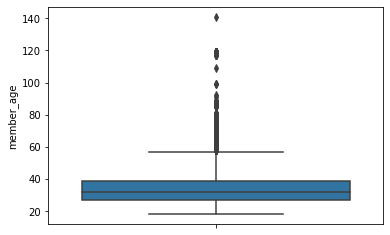

In [34]:
sb.boxplot(data = df_bike, y = 'member_age');

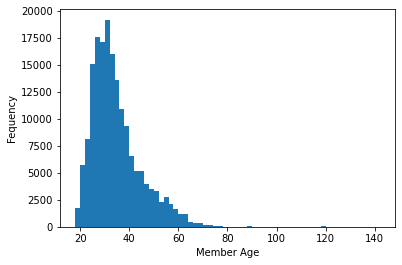

In [35]:
binsize = 2
bins = np.arange(18, df_bike['member_age'].max()+binsize, binsize)
plt.hist(data = df_bike, x = 'member_age', bins = bins)
plt.xlabel("Member Age")
plt.ylabel("Fequency");


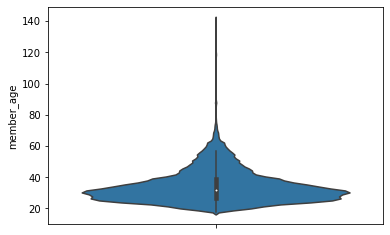

In [36]:
sb.violinplot(data = df_bike, y = 'member_age');


#### comment 
- There is a reduction in bikers above age 40
- Majority of the bikers are around the age range of 25 - 30

In [37]:
df_bike.duration_min.describe()

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

Average trip is 11.2 minutes
- 1409 minutes is the highest duration for a trip 
- Shortest trip duration is just 1 minute

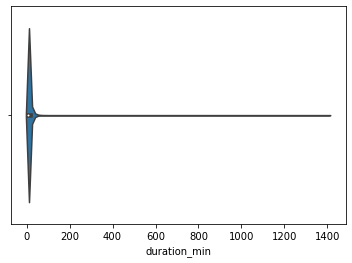

In [38]:
sb.violinplot(data = df_bike, x = 'duration_min');

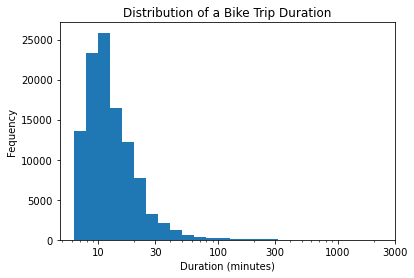

In [39]:
bin_edges = 10 ** np.arange(0.8, np.log10(df_bike["duration_min"].max()) + 0.1, 0.1)
plt.hist(data = df_bike , x = "duration_min", bins = bin_edges)
plt.xscale('log')
plt.title("Distribution of a Bike Trip Duration")
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
plt.xlabel("Duration (minutes)")
plt.ylabel("Fequency");


#### comment 
Duration in minutes is concentrated around values less than 50 minutes
.Will plot a chart below that shows duration in minutes less than 50 minutes to get a better look

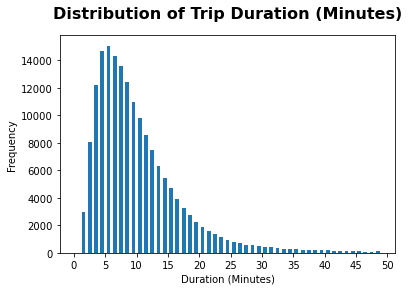

In [40]:
# Duration of the bike rides < 50 MINUTES
bin_edges = np.arange(0, 50, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45, 50]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_bike, x = 'duration_min', bins = bin_edges, rwidth = 0.6);
#sb.distplot(df_bike['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Distribution of Trip Duration (Minutes)", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minutes)')
plt.xticks(ticks, labels)
plt.ylabel('Frequency');

#### comment 
- The distribution of trip duration is skewed to the left
- The average trip is about 11 minutes, with 75% of trips being under 13 minutes. Looking at the histogram, most rides fall in between the 3 - 15 minute range. <br>
- This implies riders are making more short distance rides.

In [41]:
df_bike.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

#### comment
Maximum age of 141 is unusual

In [42]:
df_bike.member_age.mean()

34.196865425945404

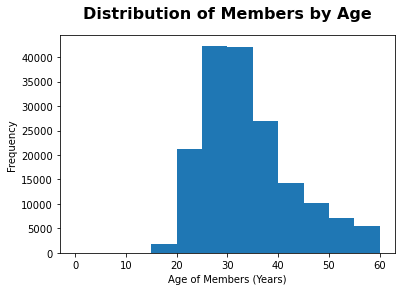

In [43]:
# Age group data
bin_edges = np.arange(0, 65, 5)

plt.hist(data = df_bike, x = 'member_age', bins = bin_edges);

plt.title("Distribution of Members by Age", y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Age of Members (Years)')
plt.ylabel('Frequency');

#### Comment
- The distribution of Members by Age is skewed to the right
- The mean age of a user is around 34 years old. The distribution is more concentrated between the range 20 to 40 years.

#### comment 
This data has more 'subsrciber' users than 'customer'

In [44]:
# Breakdown of user types
df_bike.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

#### comment
There are 174,952 users, Subscribers account for 158,386 while Customers make up the remaining

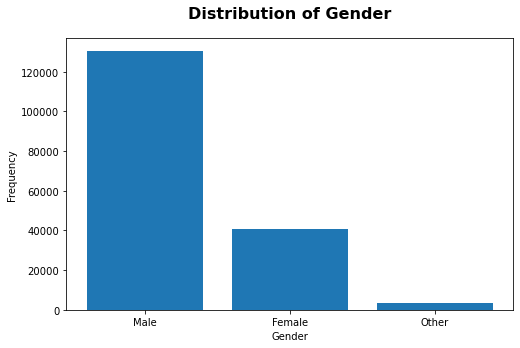

In [45]:

# plotting genders 
plt.figure(figsize=[8,5])
plt.bar(x = df_bike.member_gender.value_counts().keys(), height = df_bike.member_gender.value_counts() )
plt.title('Distribution of Gender', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Usage by females, males, and other
gender = df_bike.member_gender.value_counts()
gender

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

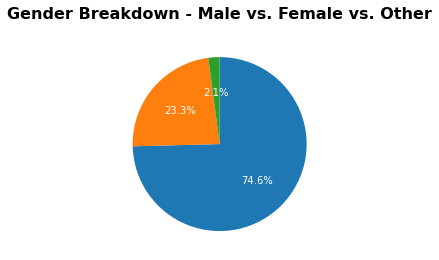

In [47]:
plt.pie(gender, labels = gender.index, startangle = 90, autopct= '%1.1f%%', counterclock = False, textprops={'color':'white'});
#plt.axis('square');
plt.title('Gender Breakdown - Male vs. Female vs. Other', y=1.05, fontsize=16, fontweight='bold', color = 'black');

#### comment
- The visual above demonstrates the overwhelming majority of the bikers are male
- Men account for about 74.4% of the total riders.<br>
- Female riders represents 23.3% of total users
- 'Other' represents the remaining 2.1% 

- Breakdown for member gender from highest to lowest is Male, Female and other <br>
- The chart revealed that Male riders are more than 3x of female riders

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
- The distribution of trip duration is skewed to the left
- The distribution of Members by Age is skewed to the right
- The maximum age of 141 was unusual
- Overall, There were no big surprises during the exploratory and visualization phase.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the member birth year variables, Birth year is converted by substracting the birth years from  the current year in order to aid my analysis for distibution for age.

<a id='Bivariate_Exploration'></a>
## Bivariate Exploration

Under this section, I will commence the Bivariate exploration process by looking at the relationship between my variables of interest which include : Number of bike trips, duration in minutes, member age, weekdays, user type, and gender in the FordGoBike data set.

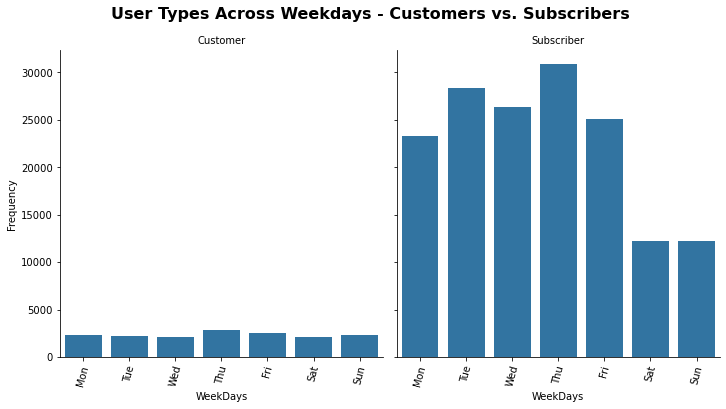

In [48]:
graph = sb.catplot(data=df_bike, x='start_time_dayofweek', col="user_type", kind='count', sharey = True, color = default_color);

graph.set_axis_labels("WeekDays", "Frequency");
graph.set_titles("{col_name}");

graph.fig.suptitle('User Types Across Weekdays - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment

- For 'Subscriber', There are relatively less bike trips during the weekends when compared to the weekdays

- Thursday was Peak period during the weekdays for both User type ( customer and Subscriber)
- After the initial peak period, the next period with high bike trips for subscribers is Tuesday while for Customer is Friday

- Customers may be tourists, or riders who occasional vist the Bay Area

- Subscribers are most likely riders that use the bikes for their daily commute.


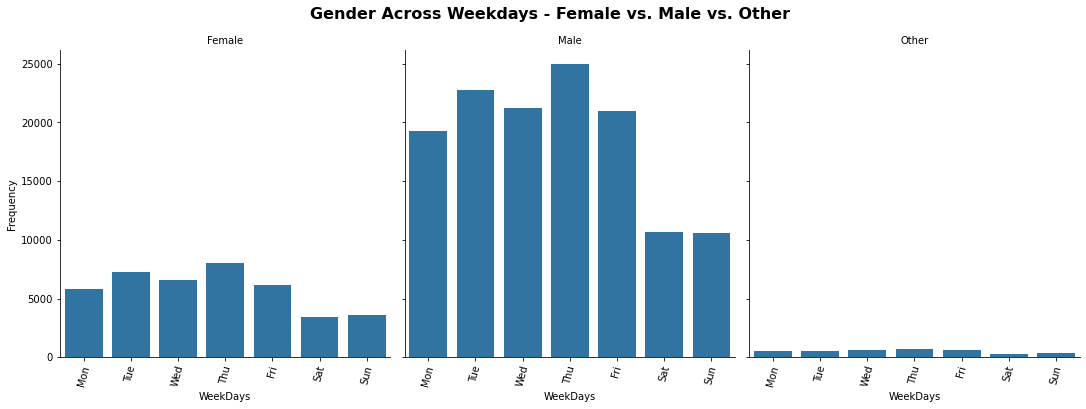

In [49]:
graph = sb.catplot(data=df_bike, x='start_time_dayofweek', col="member_gender", kind='count', sharey = True, color = default_color);

graph.set_axis_labels("WeekDays", "Frequency");
graph.set_titles("{col_name}");

graph.fig.suptitle('Gender Across Weekdays - Female vs. Male vs. Other', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment
- There are more male bike users than female riders during peak period

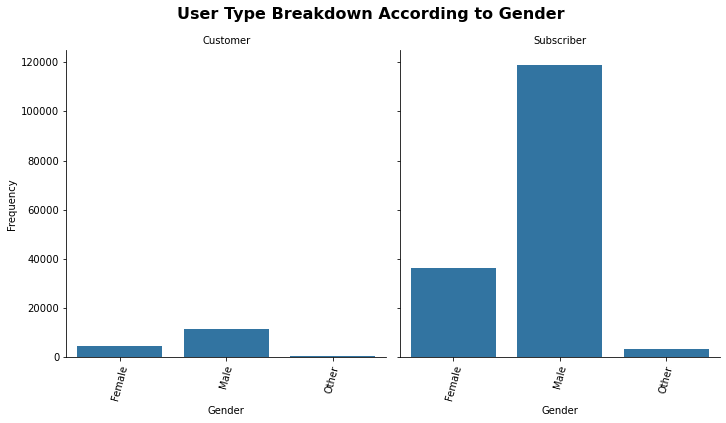

In [50]:
graph = sb.catplot(data=df_bike, x='member_gender', col="user_type", kind='count', sharey = True, color = default_color);

graph.set_axis_labels("Gender", "Frequency");
graph.set_titles("{col_name}");

graph.fig.suptitle('User Type Breakdown According to Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment 
- The plot above reveals breakdown of gender across user type ( customer & subscriber)
- The breakdown further reveals there are more male bikers than female ones as subscribers and customers

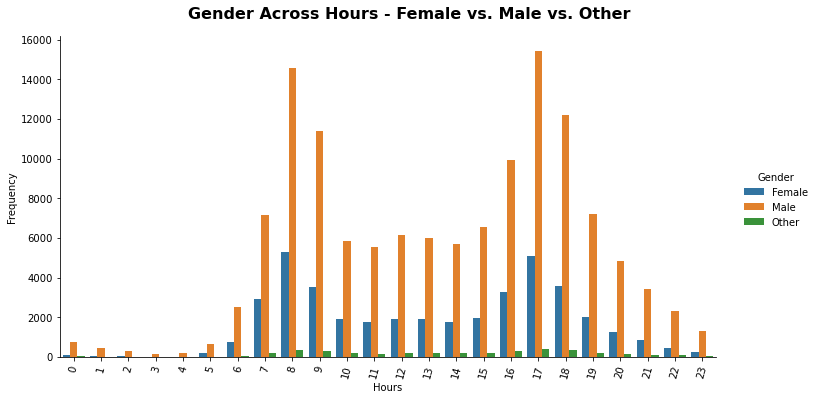

In [51]:
graph = sb.catplot(data=df_bike, x='start_time_hour',  hue="member_gender", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Hours", "Frequency")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle('Gender Across Hours - Female vs. Male vs. Other', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment
- Peak period during the morning hours are from 8:00 - 9:00 hours
- The next peak period occur during the evening hours ranging from 17:00 - 18:00 hours
- For the full 24-hours, overall peak period is 17:00 hours

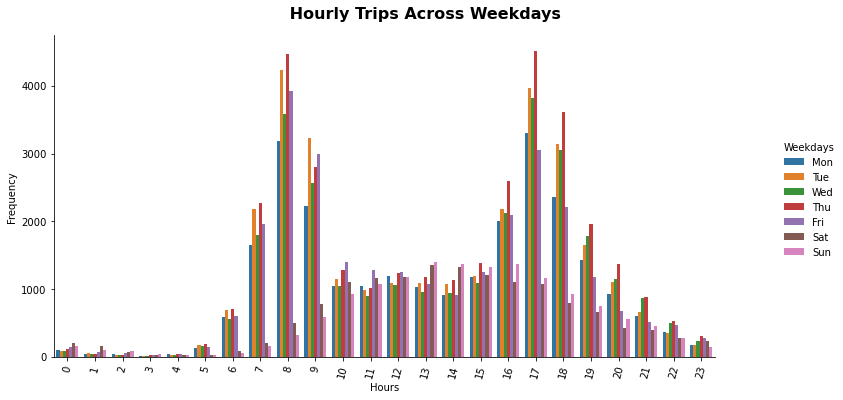

In [52]:
graph = sb.catplot(data=df_bike, x='start_time_hour',  hue='start_time_dayofweek', kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Hours", "Frequency")
graph._legend.set_title('Weekdays')
graph.set_titles("{col_name}")

graph.fig.suptitle(' Hourly Trips Across Weekdays', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment
- 3:00 - 4:00 hours have the least bike trips
- There are over 4000 bike trips during both morning and evening periods which occur at 8:00 and 17:00 hours respectively

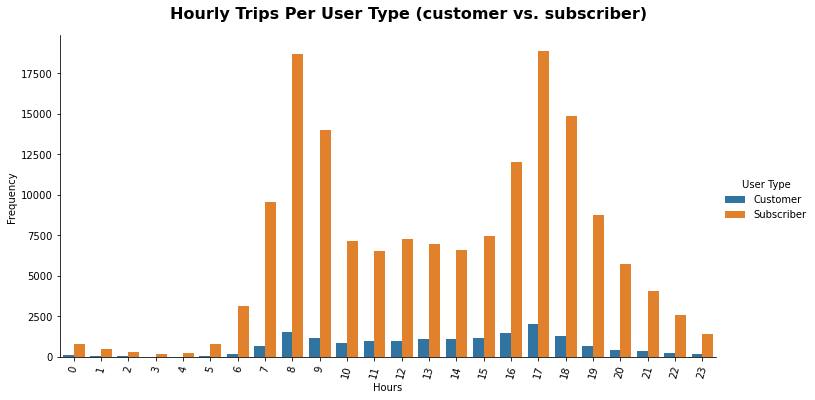

In [53]:
graph = sb.catplot(data=df_bike, x='start_time_hour',  hue='user_type', kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("Hours", "Frequency")
graph._legend.set_title('User Type')
graph.set_titles("{col_name}")

graph.fig.suptitle('Hourly Trips Per User Type (customer vs. subscriber)', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment
Out of both user types, the subscribers rank as majority during both morning and evening peak periods when compared to customers

In [54]:
vars_1 = ['member_age', 'duration_min']
vars_2 = ['start_time_hour', 'member_gender', 'start_time_dayofweek','user_type']

In [55]:
# computing the logarithm of minutes
def log_trans(x, inverse = False):
   
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_bike['log_duration_min'] = df_bike['duration_min'].apply(log_trans)

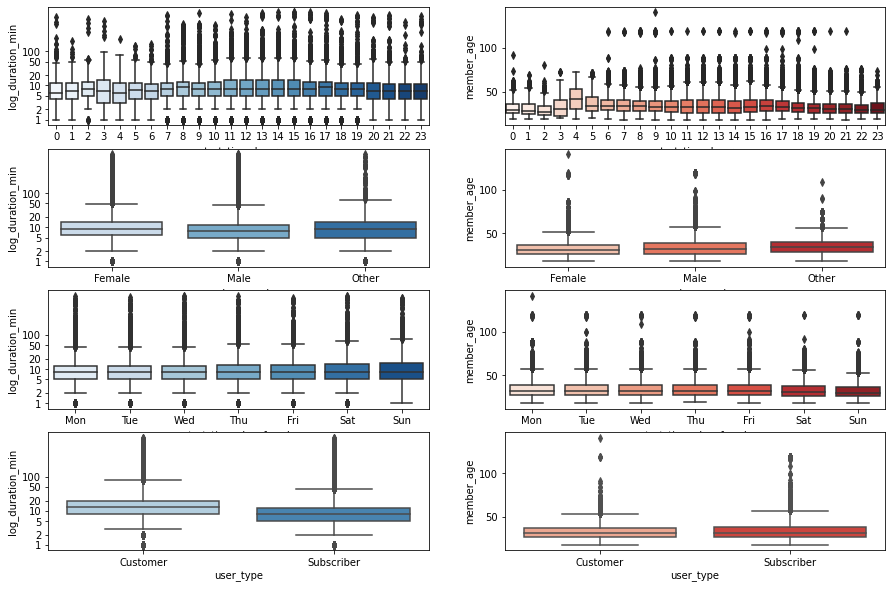

In [56]:
# plot duration_min and member_age against hours, gender, weekdays and usertype
fig, ax = plt.subplots(ncols = 2, nrows = 4 , figsize = [15,10])

for i in range(len(vars_2)):
    var = vars_2[i]
    sb.boxplot(data = df_bike, x = var, y = 'log_duration_min', ax = ax[i,0], palette = 'Blues');
    ax[i,0].set_yticks(log_trans(np.array([1, 2, 5, 10, 20, 50, 100])));
    ax[i,0].set_yticklabels([1, 2, 5, 10, 20, 50, 100]);
    sb.boxplot(data = df_bike, x = var, y = 'member_age', ax = ax[i,1], palette = 'Reds');
    

#### comment


- 'Female' and 'Other' riders embark on longer trips than 'male' riders 

- 'Customers embark on longer trips than subscribers

- Male riders and 'óther' are more older than female bikers


In [57]:
# Customers vs Subscribers
customer = df_bike.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_bike.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_bike['bike_id'].count()
subscriber_prop = subscriber / df_bike['bike_id'].count()

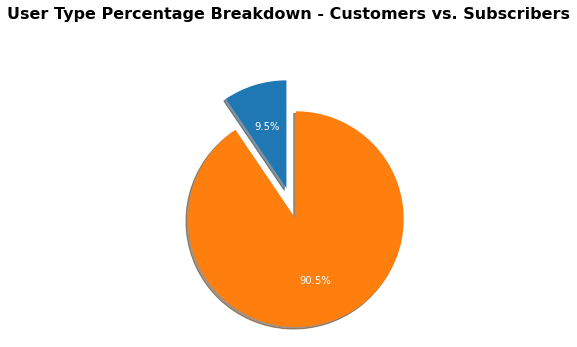

In [58]:
# Customers vs Subscribers Visuals
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow=True, startangle=90, textprops={'color':'white'})
plt.axis('equal')

plt.suptitle('User Type Percentage Breakdown - Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

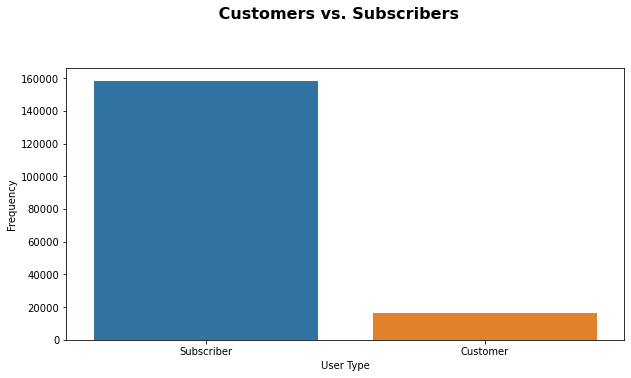

In [59]:
# Customers vs Subscribers Visuals
# bar chart
plt.figure(figsize = [10, 5])

graph = sb.countplot(data = df_bike, x = "user_type", order = df_bike.user_type.value_counts().index);
graph.set_xlabel('User Type');
graph.set_ylabel('Frequency');
plt.suptitle(' Customers vs. Subscribers', y=1.05, fontsize=16, fontweight='bold');

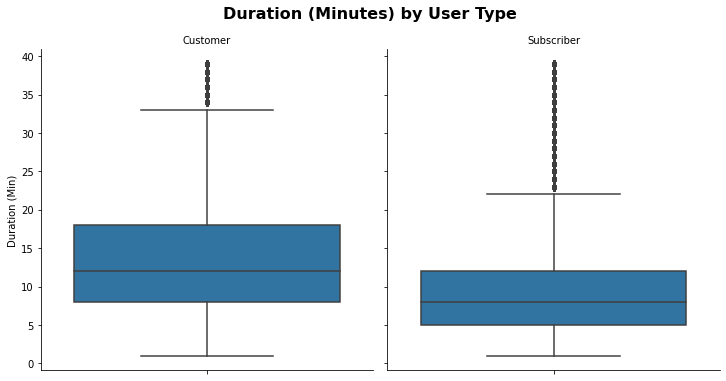

In [60]:
data = df_bike.query('duration_min < 40')

g = sb.catplot(data=data, y='duration_min', col="user_type", kind='box', color = default_color)

g.set_titles(col_template = '{col_name}')
g.set_axis_labels("", "Duration (Min)")
g.fig.suptitle('Duration (Minutes) by User Type', y=1.05, fontsize=16, fontweight='bold');

#### comment
- The plots above show the ride duration among user types spread in minutes
- According to the box plot, Customers embark on longer trips (ranging from 8 - 18 minutes) 
- While typically, subscribers have longer trips around the 5th to 11th minute

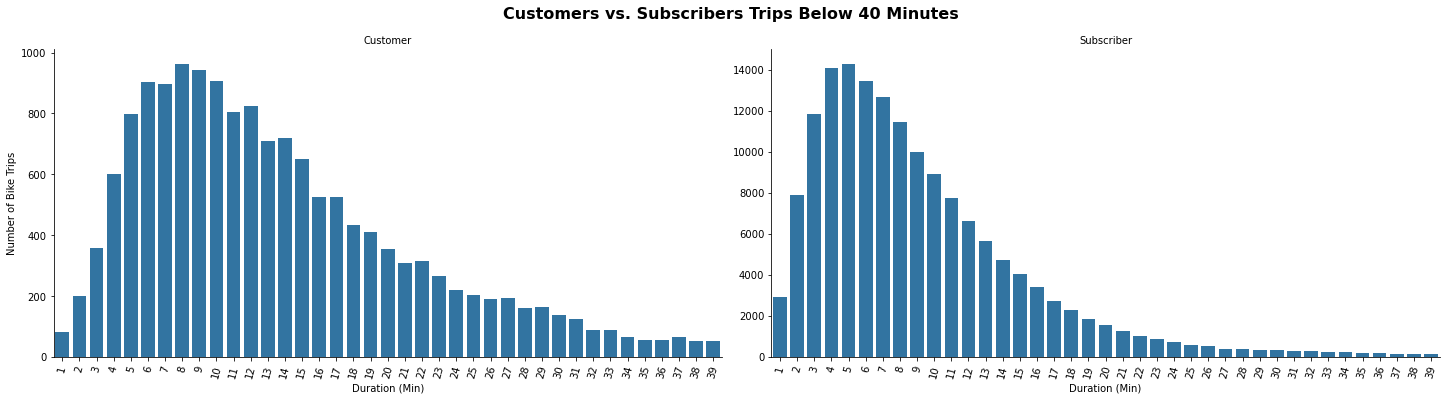

In [61]:
# Customer & Subscriber Trips by Duration

data = df_bike.query('duration_min < 40')

graph = sb.catplot(data=data, x = 'duration_min', col='user_type', kind='count', sharey = False, color = default_color, height=5, aspect=2);

graph.set_axis_labels('Duration (Min)', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Customers vs. Subscribers Trips Below 40 Minutes', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment
- For Customers bike trips peak at the 8th minute
- For customers bike trips peak around the 4th & 5th minute

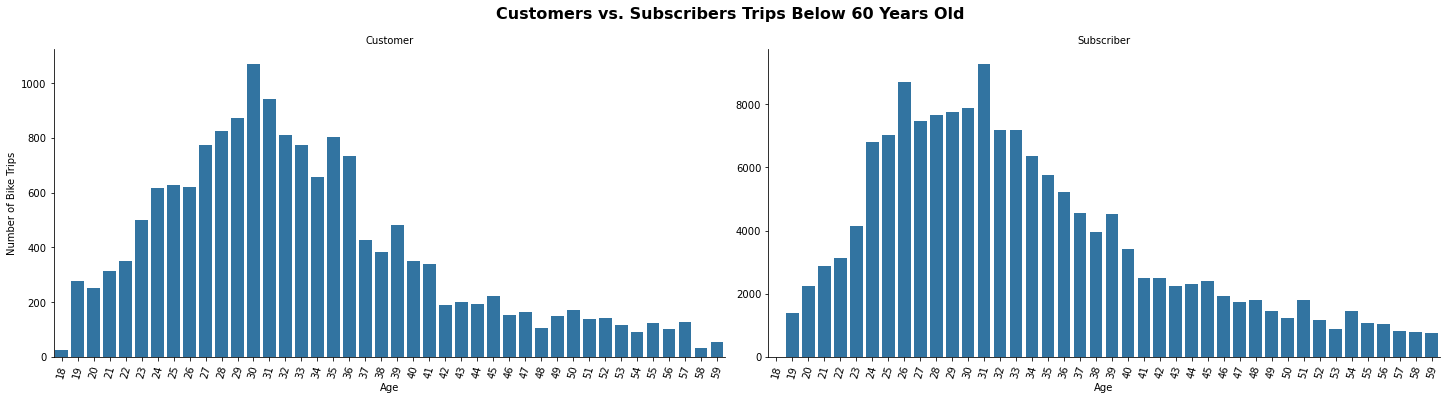

In [62]:
# Customer vs. Subscriber Usage by Age
data = df_bike.query('member_age < 60')

graph = sb.catplot(data=data, x = 'member_age', col='user_type', kind='count', sharey = False, color = default_color, height=5, aspect=2);

graph.set_axis_labels('Age', 'Number of Bike Trips')
graph.set_titles('{col_name}')

graph.fig.suptitle('Customers vs. Subscribers Trips Below 60 Years Old', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment

- For a marketing campaign, we can divide the campaign into two (customer vs subscriber). From the data above, we can focus on 'Customers' aged 27 - 36 years old.
- Still on the marketing camapign suggestion, For 'Subscribers', we can focus on ages ranging from 24 to 33.
- Customers peaked first at age 30
- Subscriber peaked first at age 25, then peaked again at age 31
- It took up to 12 years for 'Customer' to peak
- While it took just 7 years for 'Subscriber' to peak initially and the second peak came 5 years after the first peak
- For customers, members aged 30 years took the highest number of bike trips
- For subscribers, members aged 31 years took the highest number of bike trips

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There exist a relationship between number of trips and age.
- The more age increases, the less the number of trips
.

- Also, from the charts plotted in this secton, on can arrive at the conclusion that Customers trips are usually longer than that of subscribers. Supporting the assumption that customers are likely casual riders such as tourists, or students on a school vacation or holiday.

- While Subscribers make use of the biking transportation system mainly for commuting or are full time students who use the bikes during weekdays for a typical work day or school day (8-9am and 5-6pm), covering mostly shorter distances.


#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- 'Female' and 'Other' riders embark on longer trips than 'male' riders 
- 'Customers embark on longer trips than subscribers
- Male riders and 'óther' are more older than female bikers
- Out of both user types, the subscribers rank as majority during both morning and evening peak periods when compared to customers
- There are over 4000 bike trips during both morning and evening periods which occur at 8:00 and 17:00 hours respectively

<a id='Multivariate_Exploration'></a>
## Multivariate Exploration


This part of the analysis will look at how the relationship between three variables . Variables selcted from include; duration, weekdays, hours, user type, and gender

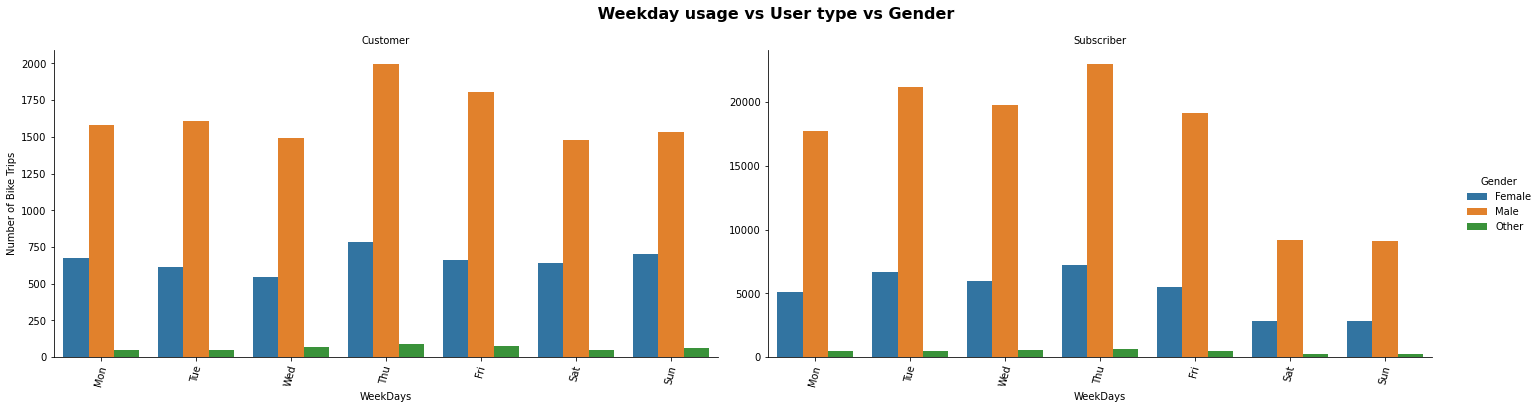

In [63]:
# Weekday usage vs user type vs gender
graph = sb.catplot(data=df_bike, x='start_time_dayofweek', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2);

graph.set_axis_labels("WeekDays", "Number of Bike Trips")
graph._legend.set_title('Gender')
graph.set_titles("{col_name}")

graph.fig.suptitle(' Weekday usage vs User type vs Gender', y=1.05, fontsize=16, fontweight='bold');
graph.set_xticklabels(rotation=75);

#### comment
- The trend for male customers and subscribers is as follows, the highest demand occur during the weekdays and peak on Thursdays
- Lowest demand for male customers and subscribers occur on weekends (both saturday and sunday).
- The trend for female subscribers is as follows, the highest demand occur during the weekdays and peak on Thursdays
- Lowest demand for female subscribers occur on weekends.
- Lowest demand from Female customers occur on Wednesday
- Lowest demand for male customer occurs on Wednesday 

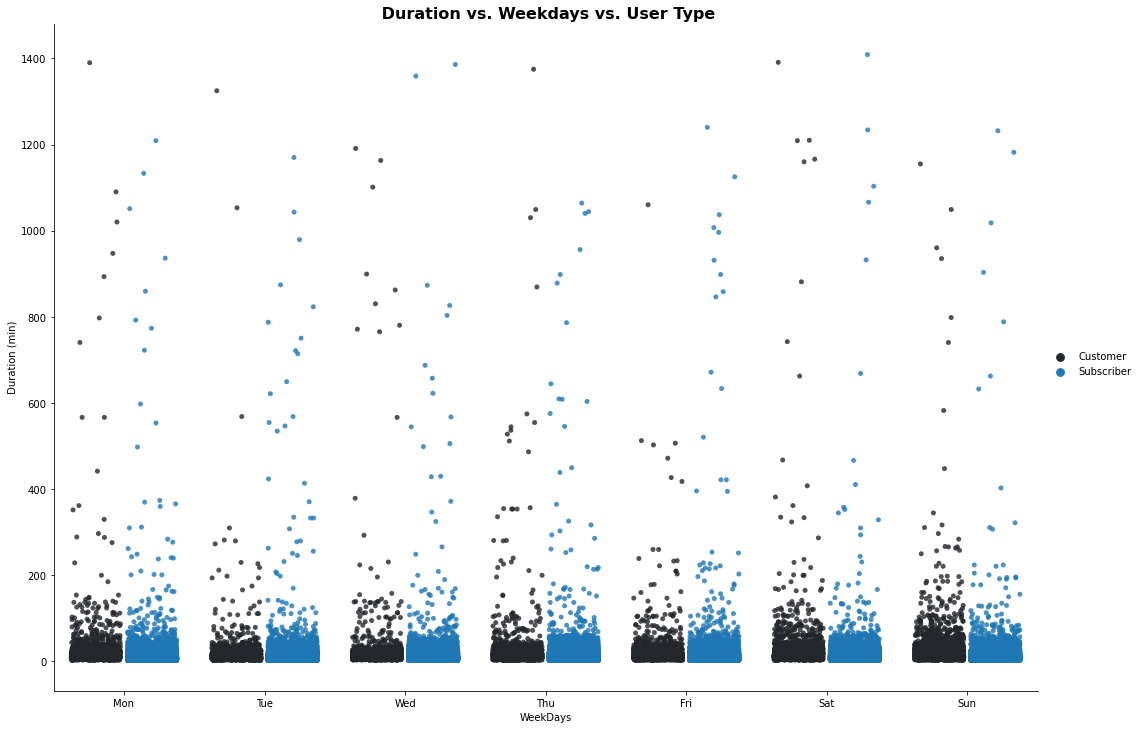

In [64]:
g = sb.FacetGrid(data = df_bike, height = 10, aspect = 14.70/10)
g.map(sb.stripplot, "start_time_dayofweek", "duration_min", "user_type", jitter = 0.35, dodge = True, alpha = 0.8)
g.add_legend()
plt.title(" Duration vs. Weekdays vs. User Type", fontsize=16, fontweight='bold')
plt.xlabel("WeekDays")
plt.ylabel(" Duration (min)");

#### comment
The strip plot above reveals that there are more subscribers relatively taking bike trips when compared to customers over the weekdays

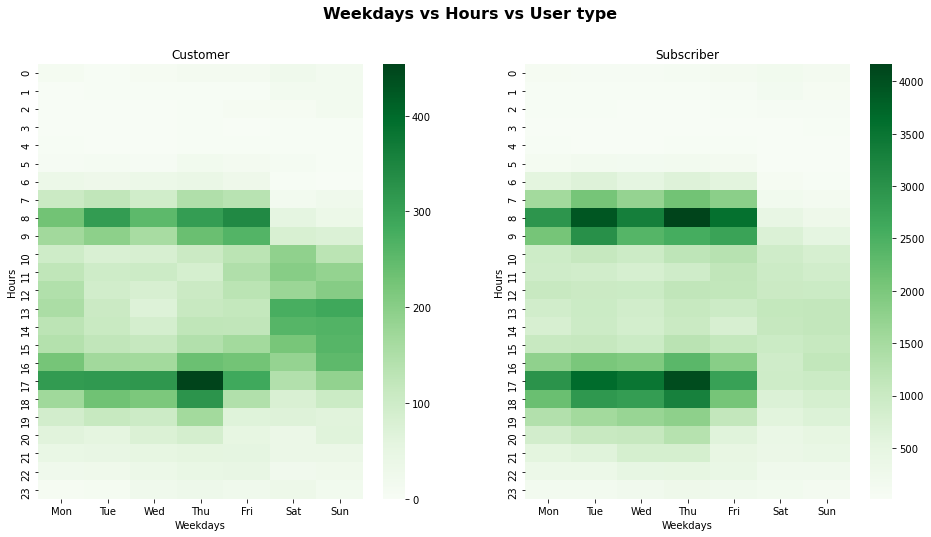

In [65]:
plt.figure(figsize = (16,8))
plt.suptitle('Weekdays vs Hours vs User type', fontsize=16, fontweight='bold')

plt.subplot(1, 2, 1)
df_customer = df_bike.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_dayofweek"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_dayofweek", "bike_id")
sb.heatmap(df_customer, cmap = "Greens")
plt.title("Customer")
plt.xlabel("Weekdays")
plt.ylabel("Hours");

plt.subplot(1, 2, 2)
df_subscriber = df_bike.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_dayofweek"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_dayofweek", "bike_id")
sb.heatmap(df_subscriber, cmap = "Greens")
plt.title("Subscriber")
plt.xlabel("Weekdays")
plt.ylabel("Hours");

#### comment
- The most active hours of the day ranges from 6:00 hours - 20:00 hours every Monday - Friday for both Customers and Subscribers
- Analyzing the pattern of the Customer user type, we can see that the most bike trips happen during 8:00 - 9:00 hours in the morning and between 16:00 - 18:00 hours ( with 17:00 hours peak) for weekdays
- Still on customer user type , During the weekend, there are fewer rides with peak of bike trips is 13:00 hours on Saturday and Sunday. 
- Studying the behavior of the Subsriber user type, we can see that the most bike trips happen during 7:00 - 9:00 hours in the morning and between 16:00 - 18:00 hours ( with 17:00 hours peak) for weekdays.
- The number of rides for  Subscribers during the weekend reduced drastically in comparison to Customers


#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- The trend for male customers and subscribers is as follows, the highest demand occur during the weekdays and peak on Thursdays
- Lowest demand for male customers and subscribers occur on weekends (both saturday and sunday).
- There are more subscribers relatively taking bike trips when compared to customers over the weekdays
- The most active hours of the day ranges from 6:00 hours - 20:00 hours every Monday - Friday for both Customers and Subscribers


#### Were there any interesting or surprising interactions between features?

- The number of rides for Subscribers during the weekend reduced drastically in comparison to Customers
- Lowest demand for male customers and subscribers occur on weekends (both saturday and sunday).
- Lowest demand from Female customers occur on Wednesday


<a id='Summary'></a>
### Summary
Overall, The GoBike system is an affordable and convenient transportation system where a large number of people can benefit from. It is also a healthy, budget and environmentally friendly way of moving around the city for both customers and subscribers

- Subscribers (i.e. daily commuters) benefit from a healthy commuting transport system
- Customers (i.e. tourists, students, etc.) have a sustainable, yet flexible way for touring the city.

During a marketing campaign, a good recommendation will be allocating more resources to target Men riders ranging from 20-40 years old. From the analysis, This was dsicovered to be an active demographic that could be targeted for marketing




<a id='Sources'></a>
### Sources

https://seaborn.pydata.org/generated/seaborn.catplot.html <br>
https://docs.google.com/document/d/e/2PACX-1vQmkX4iOT6Rcrin42vslquX2_wQCjIa_hbwD0xmxrERPSOJYDtpNc_3wwK_p9_KpOsfA6QVyEHdxxq7/pub?embedded=True <br>
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [66]:
# Storing the final dataframe as a comma-separated values (csv) file named df_bike_master.csv
df.to_csv("df_bike_master.csv", index = False, encoding = "utf-8")